In [16]:
import sys
import numpy as np
import matplotlib
import pandas
import sklearn

print('Python:{}'.format(sys.version))
print('Numpy:{}'.format(numpy.__version__))
print('Matplotlib:{}'.format(matplotlib.__version__))
print('Pandas:{}'.format(pandas.__version__))
print('Sklearn:{}'.format(sklearn.__version__))

Python:3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy:1.16.2
Matplotlib:3.1.0
Pandas:0.25.1
Sklearn:0.22.2.post1


In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [23]:
# Load the dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell size', 'uniform_cell_shape', 'marginal_adhesion', 
        'single_epithelial_size', 'bare_nuclei', 'balnd_chromatin', 'normal_nuclei', 'mitosis', 'class']
df = pd.read_csv(url, names=names)

In [24]:
df.head()

,id,clump_thickness,uniform_cell size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,balnd_chromatin,normal_nuclei,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
#preprocessing the data
df.replace("?", -99999, inplace=True)
print(df.axes)

#Drop the ID Column since it doesn't do anything in machine learning
#df.drop(['id', 1, inplace = True])

#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'balnd_chromatin', 'normal_nuclei', 'mitosis', 'class'],
      dtype='object')]
(699, 10)


In [33]:
#Do data set visualization 
print(df.loc[0])
print(df.describe())

clump_thickness           5
uniform_cell size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
balnd_chromatin           3
normal_nuclei             1
mitosis                   1
class                     2
Name: 0, dtype: object
       clump_thickness  uniform_cell size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  balnd_chromatin  \
count         699.000000              699.

<function matplotlib.pyplot.show(*args, **kw)>

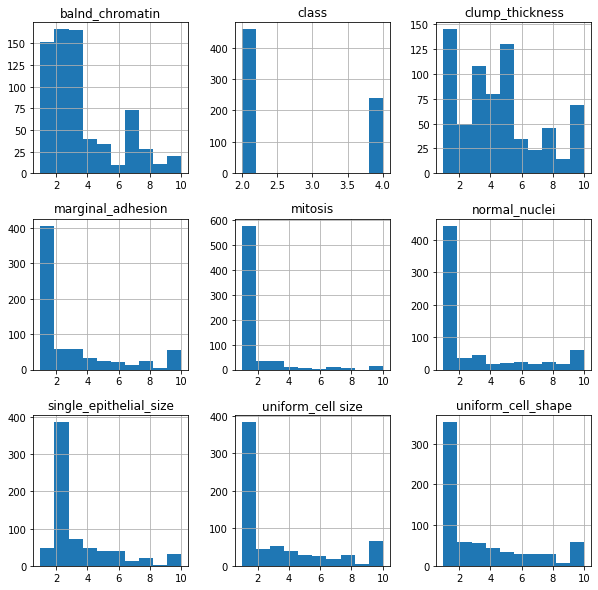

In [34]:
#plot histograms for each variable
df.hist(figsize= (10,10))
plt.show